In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
weather = pd.read_csv("Chennai_1990_2022_Madras.csv",index_col = "time")

In [9]:
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,25.2,22.8,28.4,0.5
02-01-1990,24.9,21.7,29.1,0.0
03-01-1990,25.6,21.4,29.8,0.0
04-01-1990,25.7,NaN,28.7,0.0
05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...
21-07-2022,28.4,24.5,32.8,21.1
22-07-2022,27.8,24.6,32.2,22.1
23-07-2022,27.4,24.7,32.6,18.6


In [10]:
#looks for all the null values
weather.apply(pd.isnull)

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,False,False,False,False
02-01-1990,False,False,False,False
03-01-1990,False,False,False,False
04-01-1990,False,True,False,False
05-01-1990,False,False,False,False
...,...,...,...,...
21-07-2022,False,False,False,False
22-07-2022,False,False,False,False
23-07-2022,False,False,False,False


In [11]:
#gives % of each value in columns
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.002270
tmin    0.259290
tmax    0.085673
prcp    0.410795
dtype: float64

In [12]:
weather[pd.isnull(weather["prcp"])]

,tavg,tmin,tmax,prcp
time,,,,
19-02-1990,28.0,25.2,32.6,NaN
09-03-1990,27.6,25.2,32.4,NaN
10-03-1990,27.2,24.4,29.8,NaN
11-03-1990,26.3,23.5,30.7,NaN
19-03-1990,28.1,22.9,32.4,NaN
...,...,...,...,...
28-12-2020,26.5,21.0,30.0,NaN
29-12-2020,27.1,23.4,30.0,NaN
30-12-2020,27.2,24.0,29.4,NaN


In [13]:
weather["prcp"].value_counts()

0.0      4149
0.5       247
0.3       222
1.0       163
2.0       143
         ... 
278.9       1
17.3        1
61.5        1
79.0        1
18.6        1
Name: prcp, Length: 337, dtype: int64

In [14]:
weather["prcp"] = weather["prcp"].fillna(0)

In [15]:
weather[pd.isnull(weather["tmax"])]

,tavg,tmin,tmax,prcp
time,,,,
29-01-1990,23.9,20.2,NaN,0.0
04-02-1990,24.3,NaN,NaN,31.0
05-02-1990,25.3,18.9,NaN,0.0
13-02-1990,26.3,NaN,NaN,0.0
15-02-1990,27.9,NaN,NaN,0.0
...,...,...,...,...
02-02-2018,25.1,17.6,NaN,0.0
27-03-2018,29.8,24.4,NaN,0.0
23-04-2018,31.9,27.7,NaN,0.0


In [16]:
weather = weather.fillna(method="ffill")

In [17]:
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,25.2,22.8,28.4,0.5
02-01-1990,24.9,21.7,29.1,0.0
03-01-1990,25.6,21.4,29.8,0.0
04-01-1990,25.7,21.4,28.7,0.0
05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...
21-07-2022,28.4,24.5,32.8,21.1
22-07-2022,27.8,24.6,32.2,22.1
23-07-2022,27.4,24.7,32.6,18.6


In [18]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [19]:
weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [22]:
weather.index = pd.to_datetime(weather.index, dayfirst=True)

In [23]:
weather.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11894, freq=None)

In [25]:
weather.apply(lambda x: (x==9999).sum())

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

<Axes: xlabel='time'>

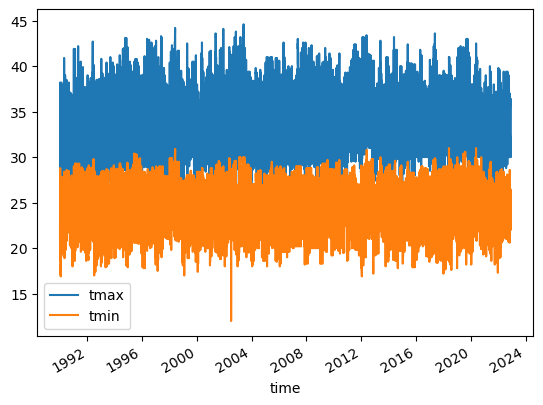

In [26]:
weather[["tmax","tmin"]].plot()

<Axes: xlabel='time'>

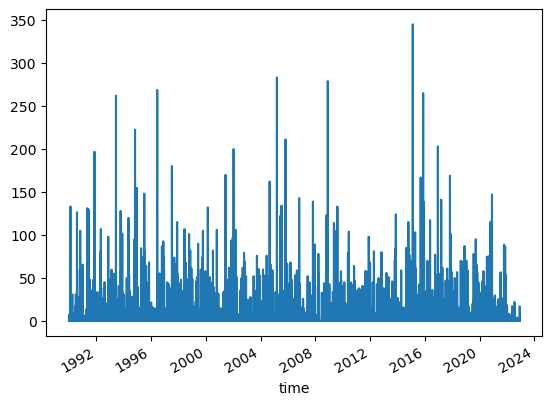

In [27]:
weather["prcp"].plot()

In [28]:
weather["target"] = weather.shift(-1)["tmax"]

In [29]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,25.2,22.8,28.4,0.5,29.1
1990-02-01,24.9,21.7,29.1,0.0,29.8
1990-03-01,25.6,21.4,29.8,0.0,28.7
1990-04-01,25.7,21.4,28.7,0.0,28.4
1990-05-01,25.5,20.7,28.4,0.0,26.1
...,...,...,...,...,...
2022-07-21,28.4,24.5,32.8,21.1,32.2
2022-07-22,27.8,24.6,32.2,22.1,32.6
2022-07-23,27.4,24.7,32.6,18.6,33.3


In [30]:
weather = weather.iloc[:-1,:].copy()

In [31]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,25.2,22.8,28.4,0.5,29.1
1990-02-01,24.9,21.7,29.1,0.0,29.8
1990-03-01,25.6,21.4,29.8,0.0,28.7
1990-04-01,25.7,21.4,28.7,0.0,28.4
1990-05-01,25.5,20.7,28.4,0.0,26.1
...,...,...,...,...,...
2022-07-20,28.9,26.2,33.0,9.3,32.8
2022-07-21,28.4,24.5,32.8,21.1,32.2
2022-07-22,27.8,24.6,32.2,22.1,32.6


In [32]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)

In [33]:
predictors = ["prcp", "tmax", "tmin"]

In [41]:
train = weather.loc[:"31-12-2020"]
test = weather.loc["01-01-2021":]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6424\1366750115.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train = weather.loc[:"31-12-2020"]


In [42]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [43]:
predictions = reg.predict(test[predictors])

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(test["target"], predictions)

0.8331897488960354

In [46]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)

In [48]:
combined.columns = ["actual", "predictions"]

In [49]:
combined

,actual,predictions
time,,
2021-01-01,25.4,30.214931
2021-02-01,27.8,26.663124
2021-03-01,28.6,28.654549
2021-04-01,26.8,29.231413
2021-05-01,28.6,27.900326
...,...,...
2022-07-20,32.8,33.418474
2022-07-21,32.2,33.022400
2022-07-22,32.6,32.539609


<Axes: xlabel='time'>

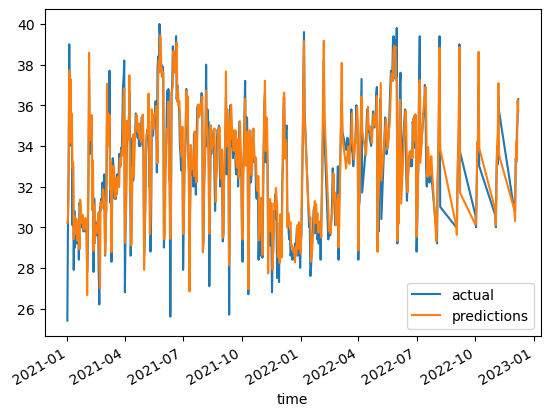

In [50]:
combined.plot()

In [51]:
reg.coef_

array([0.00172807, 0.83204726, 0.14709154])

In [55]:
def create_predictions(predictors, weather, reg):
    train = weather.loc[:"31-12-2020"]
    test = weather.loc["01-01-2021":]
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [56]:
predictors = ["prcp", "tmax", "tavg", "tmin"]

In [57]:
error, combined = create_predictions(predictors, weather, reg)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6424\2835396098.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train = weather.loc[:"31-12-2020"]


In [58]:
error

0.793372939394215

<Axes: xlabel='time'>

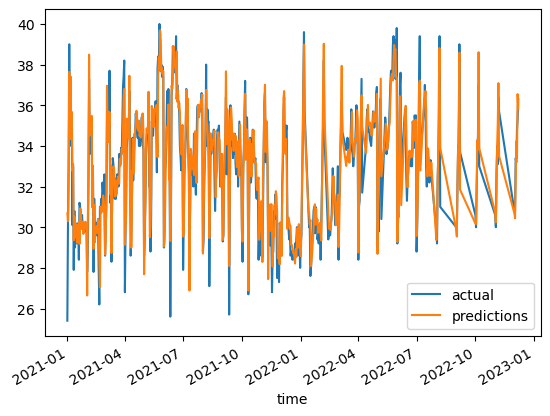

In [59]:
combined.plot()